In [1]:
from data_cleaning import *


c:\Users\Tyreek ALEXANDER\OneDrive - Northern Caribbean University\Documents\EffectiveXGBoost\SURVEY\preprocessing.py:19: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  kag=pd.read_csv(z.open(member_name))


In [2]:
(Xtrain
 .assign(data_scientist=kag_y_train=='Data Scientist')
 .corr(method='spearman')
 .style
 .background_gradient(cmap='RdBu',vmax=1,vmin=-1)
 .set_sticky(axis='index')
)

,age,education,years_exp,compensation,python,r,sql,Q1_Male,Q1_Female,Q1_Prefer not to say,Q1_Prefer to self-describe,Q3_United States of America,Q3_India,Q3_China,major_cs,major_other,major_eng,major_Mathematics or statistics,data_scientist
age,1.000000,0.345717,0.644863,0.451349,0.046651,0.127667,0.134325,0.014277,-0.033693,0.051232,0.041474,0.371123,-0.363626,-0.023384,-0.223529,0.201910,0.006262,0.073864,0.075440
education,0.345717,1.000000,0.098849,0.241393,0.060259,0.151244,0.066620,-0.079534,0.064777,0.060984,0.002701,0.272790,-0.273408,-0.006441,-0.216724,0.164771,-0.001043,0.121294,0.266717
years_exp,0.644863,0.098849,1.000000,0.255164,-0.055408,0.012090,0.050181,0.083624,-0.097564,0.034470,0.016784,0.117912,-0.136666,0.029630,-0.046551,0.018267,0.004264,0.042917,-0.145461
compensation,0.451349,0.241393,0.255164,1.000000,0.165070,0.171485,0.201336,0.000967,0.002912,-0.035554,0.049881,0.616759,-0.556154,-0.123281,-0.225934,0.241580,-0.060256,0.109100,0.174434
python,0.046651,0.060259,-0.055408,0.165070,1.000000,0.183665,0.287957,0.039944,-0.039207,-0.006729,-0.000553,0.052339,-0.043101,-0.017642,-0.095136,0.093887,0.008640,0.013474,0.121741
r,0.127667,0.151244,0.012090,0.171485,0.183665,1.000000,0.276862,-0.066982,0.068157,0.004831,-0.004454,0.178682,-0.105625,-0.133029,-0.205538,0.139994,-0.022082,0.162942,0.329124
sql,0.134325,0.066620,0.050181,0.201336,0.287957,0.276862,1.000000,-0.026692,0.032639,-0.010814,-0.018499,0.166587,-0.107382,-0.108406,-0.130081,0.109862,-0.012964,0.073906,0.117941
Q1_Male,0.014277,-0.079534,0.083624,0.000967,0.039944,-0.066982,-0.026692,1.000000,-0.957007,-0.222963,-0.094664,-0.144665,0.116961,0.052566,0.062605,-0.071139,0.028492,-0.039544,-0.091126
Q1_Female,-0.033693,0.064777,-0.097564,0.002912,-0.039207,0.068157,0.032639,-0.957007,1.000000,-0.045225,-0.019201,0.131051,-0.105490,-0.048434,-0.049753,0.064054,-0.034760,0.036779,0.086614
Q1_Prefer not to say,0.051232,0.060984,0.034470,-0.035554,-0.006729,0.004831,-0.010814,-0.222963,-0.045225,1.000000,-0.004473,0.046366,-0.038587,-0.014918,-0.045908,0.010336,0.029149,0.021052,0.018540


This is spearmans correlation efficient of features.

the value ranges from -1 : 1.
a pos sitive correlation means as one value increases, the other value also tends increases.
a 0 correlation means [there is no relationship] one value is unchanged while the other value increases.
a negative correlation means that as one variable increases the other tends to goes up.

spearmans coefficient uses ordinal data as well as cardinal/continuous

<AxesSubplot:xlabel='r'>

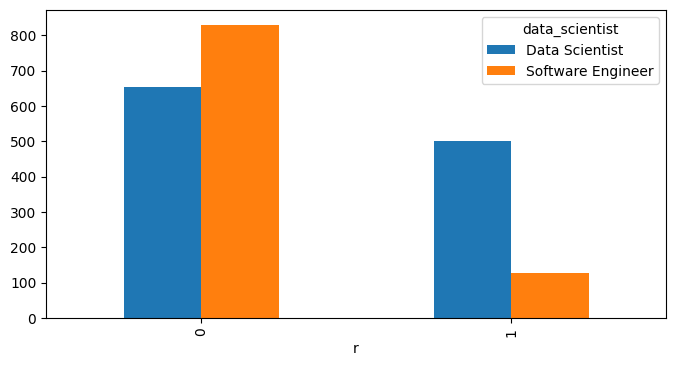

In [3]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots(figsize=(8,4))
(Xtrain
 .assign(data_scientist=kag_y_train)
 .groupby('r')
 .data_scientist
 .value_counts()
 .unstack()
 .plot.bar(ax=ax))

<AxesSubplot:xlabel='major_cs'>

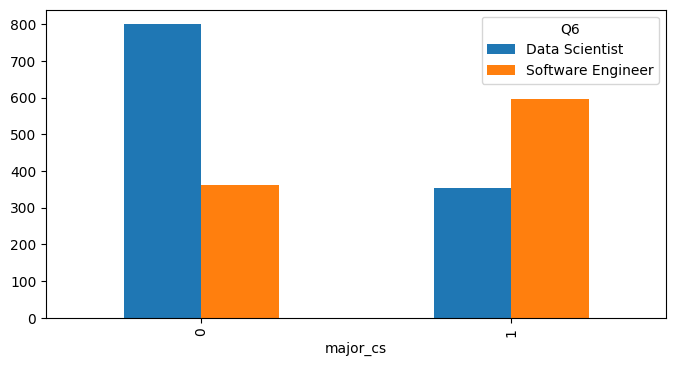

In [4]:

fig, ax = plt.subplots(figsize=(8, 4))
(pd.crosstab(index=Xtrain['major_cs'],
    columns=kag_y)
.plot.bar(ax=ax)
)

<AxesSubplot:xlabel='years_exp', ylabel='compensation'>

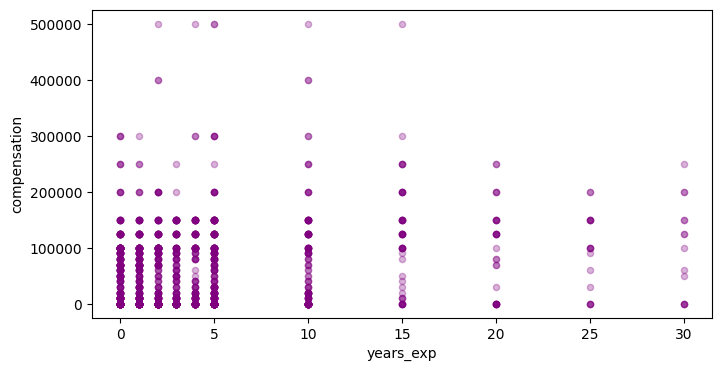

In [5]:
fig,ax=plt.subplots(figsize=(8,4))
(Xtrain
 .plot.scatter(x='years_exp',y='compensation',alpha=.3,ax=ax,c='purple')
 )

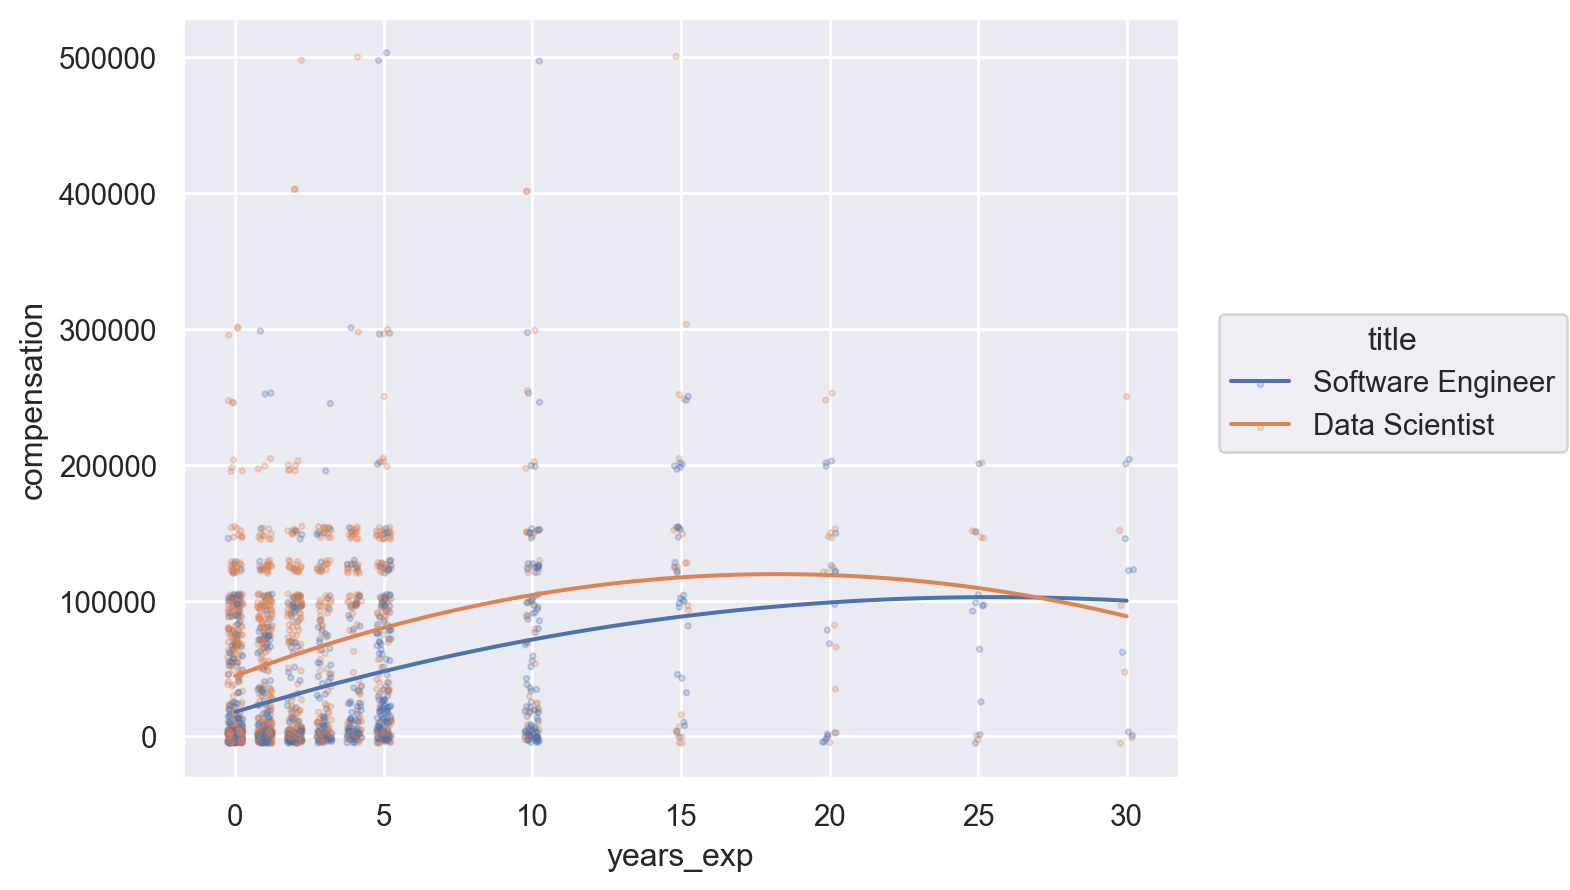

<Figure size 800x400 with 0 Axes>

In [6]:
import seaborn.objects as so
fig=plt.figure(figsize=(8,4))
(so
 .Plot(Xtrain.assign(title=kag_y_train),x='years_exp',y='compensation',color='title')
 .add(so.Dots(alpha=.3,pointsize=2),so.Jitter(x=.5,y=10_000))
 .add(so.Line(),so.PolyFit())
#  .on(fig)
 .plot()
)

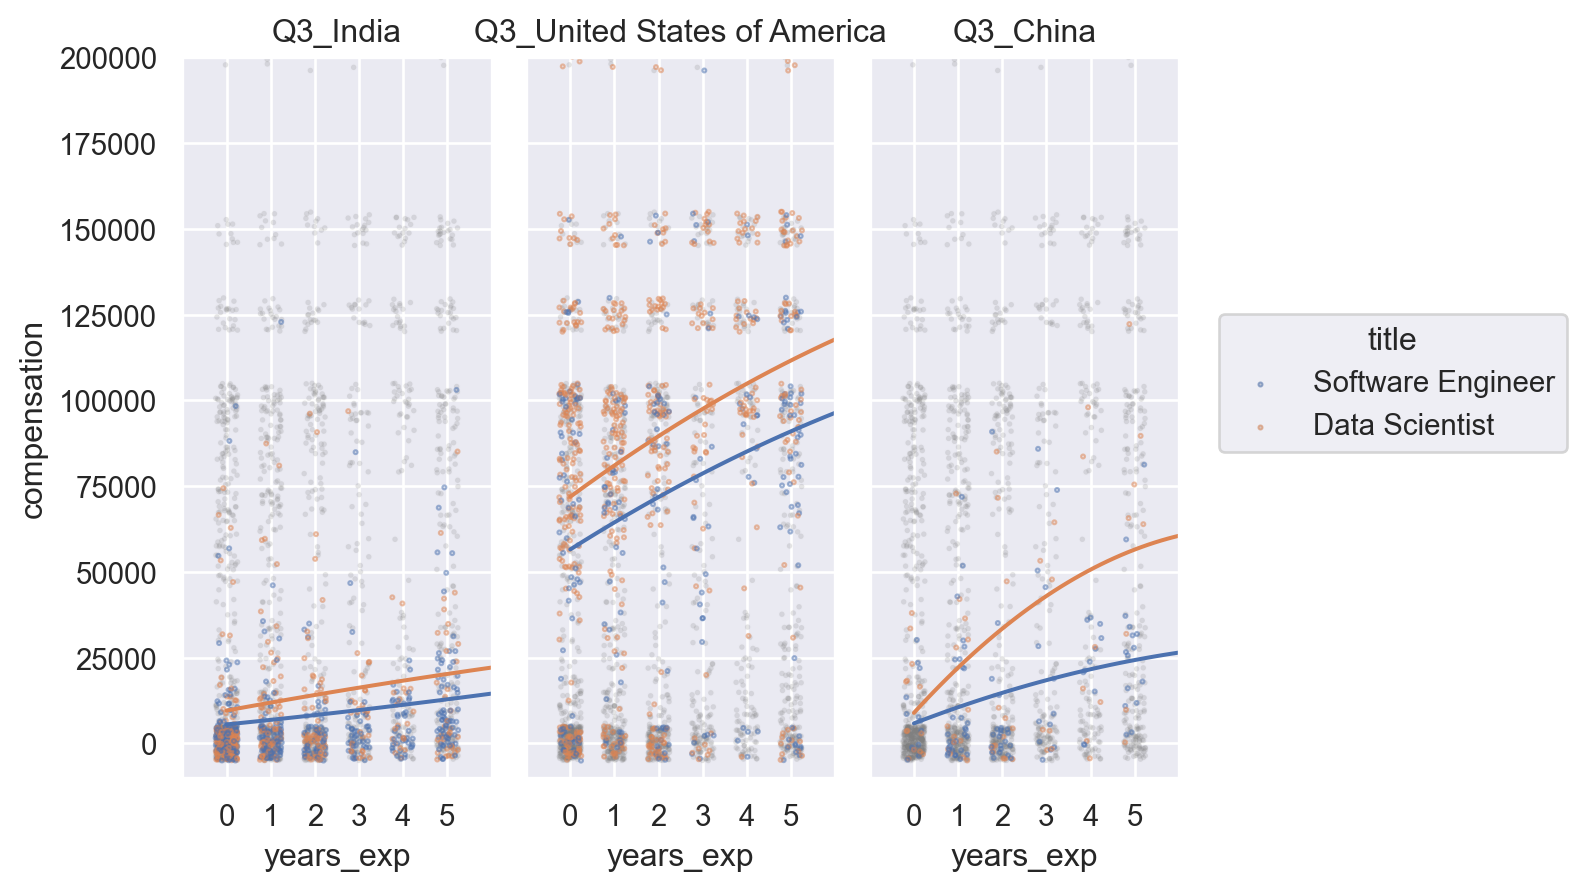

<Figure size 800x400 with 0 Axes>

In [7]:
fig=plt.figure(figsize=(8,4))
(so
 .Plot(Xtrain
       #.query('compensation<200_000 and years_exp<16')
       .assign(
        title=kag_y_train,
        country=(Xtrain
                 .loc[:,'Q3_United States of America':'Q3_China']
                 .idxmax(axis='columns')
                 )
        ),x='years_exp',y='compensation',color='title')
        .facet('country')
        .add(so.Dots(alpha=.01,pointsize=2,color='grey'),so.Jitter(x=.5,y=10_000),col=None)
        .add(so.Dots(alpha=.5,pointsize=1.5),so.Jitter(x=.5,y=10_000))
        .add(so.Line(pointsize=1),so.PolyFit(order=2))
        .scale(x=so.Continuous().tick(at=[0,1,2,3,4,5]))
        .limit(y=(-10_000,200_000),x=(-1,6))
        .plot()
        )